In [ ]:
%matplotlib inline
import numpy as np
from sklearn.covariance import GraphLassoCV, LedoitWolf
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt

fold_g = 'F:/IRM_Marche/'
smt='ss'       
names='ap','as','boh','bh','bi','cmp','cas','cs','cb','gm','gn','gbn','mv','ms','pm','pc','ph','pa','pv','pom','rdc','ti','vs'
label=np.loadtxt(fold_g+'label_main.txt','S12')
block=np.loadtxt(fold_g+'block_main.txt','int')
motor_region=np.fromfile('F:/IRM_Marche/masquesROI/reg_whole70_basc444asym.np','int')
mask_block=block==block
for x in range(label.shape[0]):
    if label[x,2]!=label[x-1,2]:
        mask_block[x]=False
    elif label[x,2]!=label[x-2,2]:
        mask_block[x]=False

c_des_out=np.logical_not(label[:,2]== b'des')
tmp_out= np.logical_and(c_des_out,mask_block)
c_rest_out=np.logical_not(label[:,0]== b'rest')
cond_out= np.logical_and(tmp_out,c_rest_out)

y=label[cond_out,2]
for i,n in enumerate(sorted(names)):
    plt.figure()
    roi_name=fold_g+'mni4060/asymroi_'+smt+'_'+n+'.npz'   
    roi=np.load(roi_name)['roi'][cond_out]
    roi=roi[:,motor_region-1]


estimator = LedoitWolf()
scaler=StandardScaler()
labels=np.unique(y)

# Analyse de similarité

In [2]:
%matplotlib inline
import numpy as np
from sklearn.covariance import GraphLassoCV, LedoitWolf
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt


def rsa_corr(X,y):
    estimator = LedoitWolf()
    scaler=StandardScaler()
    labels=np.unique(y)
    nf=X.shape[1]
    matrix={}
    cov_matrix_all=np.zeros((len(labels)*nf,len(labels)*nf))
    for i,i_label in enumerate(sorted(labels)):
        matrix[i]={}
        for j,j_label in enumerate(sorted(labels)):
            X_cond=X[np.logical_or(y==i_label,y==j_label)]           
            X_cond_scale=scaler.fit_transform(X_cond)   
            estimator.fit(X_cond_scale)
            matrix[i][j]=estimator.covariance_   
            ni=i*nf
            nj=j*nf
            cov_matrix_all[ni:ni+nf,nj:nj+nf]=estimator.covariance_
    return cov_matrix_all,matrix
    #matrix_0=np.hstack((matrix[0][0],matrix[0][1],matrix[0][2],matrix[0][3]))
    #matrix_1=np.hstack((matrix[1][0],matrix[1][1],matrix[1][2],matrix[1][3]))
    #matrix_2=np.hstack((matrix[2][0],matrix[2][1],matrix[2][2],matrix[2][3]))
    #matrix_3=np.hstack((matrix[3][0],matrix[3][1],matrix[3][2],matrix[3][3]))
    #matrix_final=np.vstack((matrix_0,matrix_1,matrix_2,matrix_3))

def bounds_to_loc(bounds):
    bounds_titles = bounds
    bounds_titles = np.hstack([0,bounds_titles])
    network_titles_pl = np.zeros_like(bounds_titles)
    for k in range(0,bounds_titles.shape[0]-1):
        network_titles_pl[k] = 0.5*(bounds_titles[k+1] + bounds_titles[k] ) 
    network_titles_pl = network_titles_pl[:-1]
    return network_titles_pl

def plot_matrices(matrix,y,vmax,vmin):
    label=sorted(np.unique(y))
    nf=int(matrix.shape[0]/len(label))
    
    plt.imshow(matrix, vmin=vmin, vmax=vmax, cmap='RdBu_r',
                   interpolation='nearest')
    bounds=nf-0.5
    for l in range(len(label)-1):
        bounds=np.hstack([bounds,nf*(2+l)-0.5])
    locs=bounds_to_loc(bounds)
    fontsize=14
    plt.xticks([])
    plt.xticks(locs,label,rotation=40)
    plt.yticks([])
    plt.yticks(locs,label,)
    #plt.tight_layout()
    plt.title(n)
    plt.colorbar()
    for b in bounds:
        plt.axhline(b,color='k')
        plt.axvline(b,color='k')
    plt.show()


C:\Users\mmenoret\Miniconda2\envs\fmri_3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


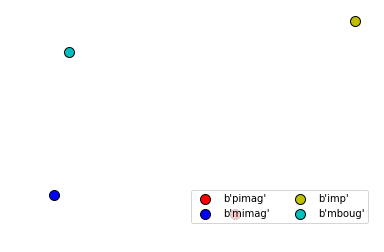

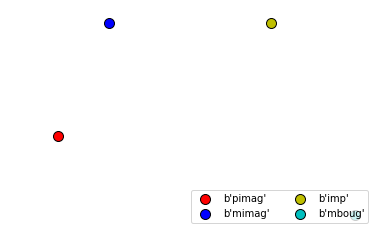

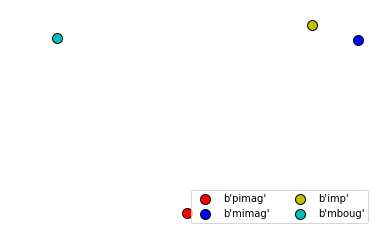

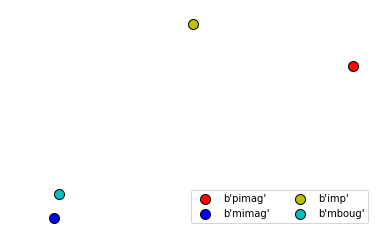

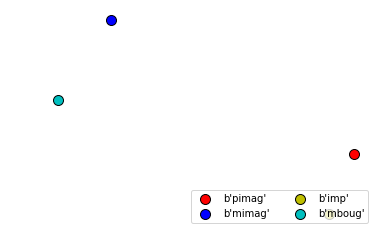

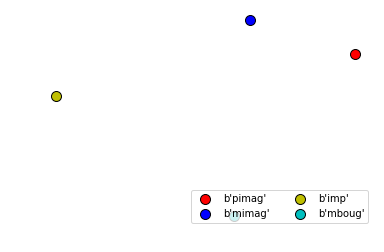

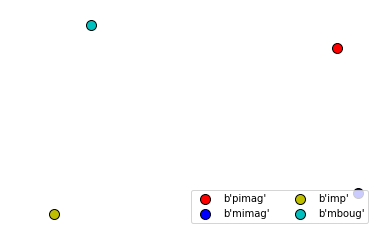

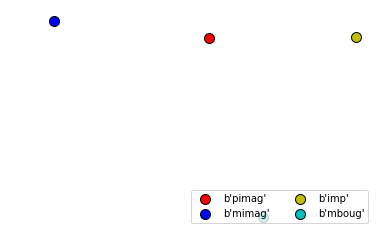

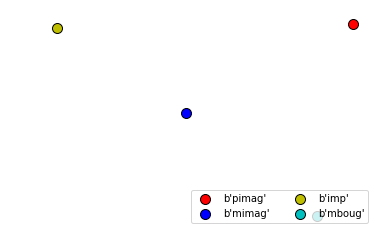

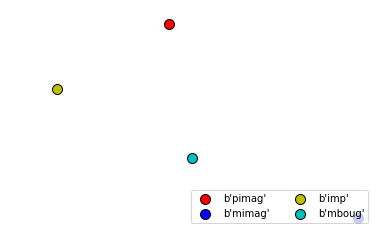

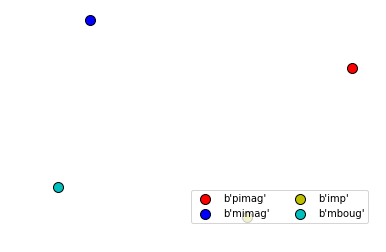

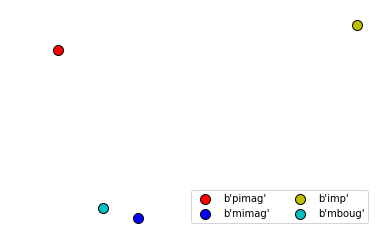

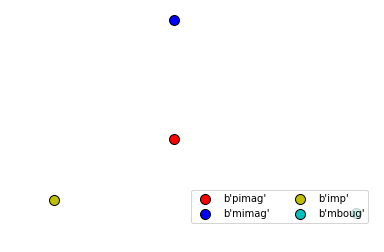

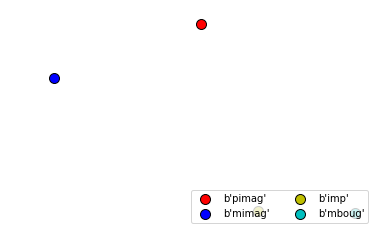

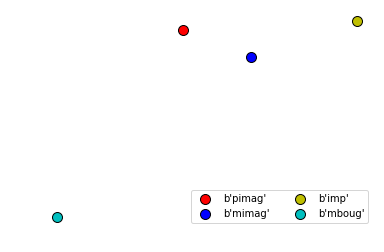

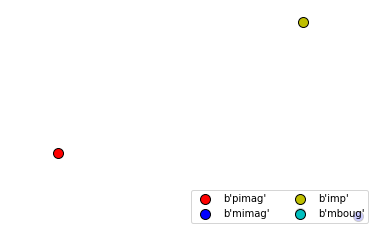

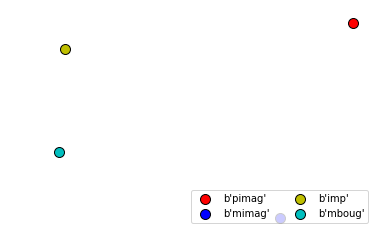

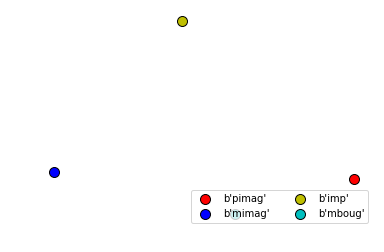

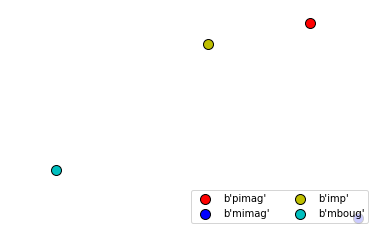

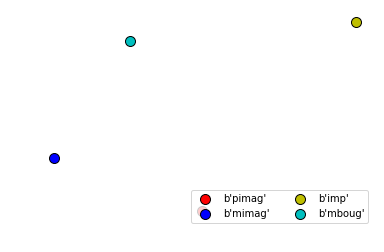

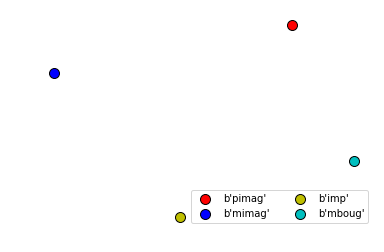

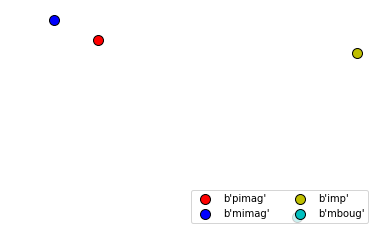

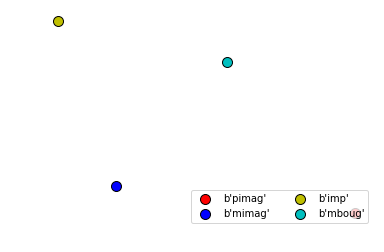

In [51]:
fold_g = 'F:/IRM_Marche/'
smt='ss'       
names='ap','as','boh','bh','bi','cmp','cas','cs','cb','gm','gn','gbn','mv','ms','pm','pc','ph','pa','pv','pom','rdc','ti','vs'
label=np.loadtxt(fold_g+'label_main.txt','S12')
block=np.loadtxt(fold_g+'block_main.txt','int')
motor_region=np.fromfile('F:/IRM_Marche/masquesROI/reg_whole70_basc444asym.np','int')
mask_block=block==block
for x in range(label.shape[0]):
    if label[x,2]!=label[x-1,2]:
        mask_block[x]=False
    elif label[x,2]!=label[x-2,2]:
        mask_block[x]=False

c_des_out=np.logical_not(label[:,2]== b'des')
tmp_out= np.logical_and(c_des_out,mask_block)
c_rest_out=np.logical_not(label[:,0]== b'rest')
cond_out= np.logical_and(tmp_out,c_rest_out)

y=label[cond_out,2]

for i,n in enumerate(sorted(names)):
    plt.figure()
    roi_name=fold_g+'mni4060/asymroi_'+smt+'_'+n+'.npz'   
    roi=np.load(roi_name)['roi'][cond_out]
    roi=roi[:,motor_region-1]
    matrix,matrices=rsa_corr(roi,y)
    vmax = np.max(np.abs(matrix))
    #plot_matrices(matrix,label,vmax=vmax,vmin=-vmax)
    dis=1-matrix
    vmax = np.max(dis)
    vmin = np.min(dis)
   # plot_matrices(dis,y,vmax=vmax,vmin=vmin)
    from sklearn.manifold import MDS
    mds = MDS(2, random_state=0, dissimilarity='precomputed')
    summary = mds.fit_transform(dis)
    cmap = plt.get_cmap('rainbow')
    colors = ['r', 'b','y','c']
    names = np.unique(y)
    for color, name in zip(colors, set(names)):
        sel = np.where([this_name == name for this_name in names])[0]
        size = 500 if name == 'human face' else 100
        plt.scatter(summary[sel, 0], summary[sel, 1], s=size,
               facecolors=color, label=name, edgecolors='k')
    plt.axis('off')
    plt.legend(loc='lower right', scatterpoints=1, ncol=2)
#plt.show()

In [53]:
summary.shape

(736, 2)

## MDS


In [33]:
dis_all[1]

array([[  1.11022302e-16,   1.11261940e+00,   1.02316268e+00, ...,
          8.47948398e-01,   9.45341560e-01,   8.84157817e-01],
       [  1.11261940e+00,   0.00000000e+00,   9.44331725e-01, ...,
          1.17267847e+00,   1.09912032e+00,   1.28454707e+00],
       [  1.02316268e+00,   9.44331725e-01,   0.00000000e+00, ...,
          8.96535746e-01,   1.03520496e+00,   1.14317919e+00],
       ..., 
       [  8.47948398e-01,   1.17267847e+00,   8.96535746e-01, ...,
         -2.22044605e-16,   9.95313794e-01,   9.77617129e-01],
       [  9.45341560e-01,   1.09912032e+00,   1.03520496e+00, ...,
          9.95313794e-01,  -2.22044605e-16,   9.35157140e-01],
       [  8.84157817e-01,   1.28454707e+00,   1.14317919e+00, ...,
          9.77617129e-01,   9.35157140e-01,   0.00000000e+00]])

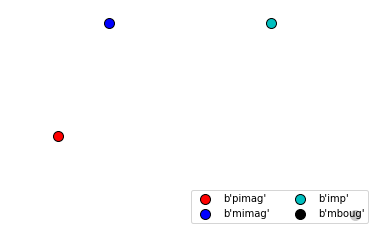

In [24]:
from sklearn.manifold import MDS
mds = MDS(2, random_state=0, dissimilarity='precomputed')
summary = mds.fit_transform(dis)
cmap = plt.get_cmap('rainbow')
colors = ['r', 'b','c','k']
names = np.unique(y)
for color, name in zip(colors, set(names)):
    sel = np.where([this_name == name for this_name in names])[0]
    size = 500 if name == 'human face' else 100
    plt.scatter(summary[sel, 0], summary[sel, 1], s=size,
               facecolors=color, label=name, edgecolors='k')
plt.axis('off')
plt.legend(loc='lower right', scatterpoints=1, ncol=2)
plt.show()

In [44]:
MDS.fit_transform?


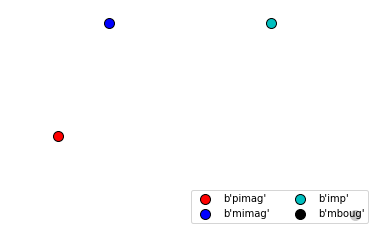

In [14]:
cmap = plt.get_cmap('rainbow')
colors = ['r', 'b','c','k']
names = np.unique(y)
for color, name in zip(colors, set(names)):
    sel = np.where([this_name == name for this_name in names])[0]
    size = 500 if name == 'human face' else 100
    plt.scatter(summary[sel, 0], summary[sel, 1], s=size,
               facecolors=color, label=name, edgecolors='k')
plt.axis('off')
plt.legend(loc='lower right', scatterpoints=1, ncol=2)
plt.show()

In [210]:
summary.shape

(888, 2)